<a href="https://colab.research.google.com/github/apriarami789/MachineLearning_MhdApriArami/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Mhd_Apri_Arami.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Hapus simbol pagar (#) jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from scipy import stats

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 10 baris pertama dengan function `head()`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info()`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe()`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [110]:
# Tampilkan 10 baris pertama dengan function head.
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url,parse_dates=['TransactionDate','PreviousTransactionDate'])

df.head(10)

TransactionID AccountID  TransactionAmount     TransactionDate  \
0      TX000001   AC00128              14.09 2023-04-11 16:29:14   
1      TX000002   AC00455             376.24 2023-06-27 16:44:19   
2      TX000003   AC00019             126.29 2023-07-10 18:16:08   
3      TX000004   AC00070             184.50 2023-05-05 16:32:11   
4      TX000005   AC00411              13.45 2023-10-16 17:51:24   
5      TX000006   AC00393              92.15 2023-04-03 17:15:01   
6      TX000007   AC00199               7.08 2023-02-15 16:36:48   
7      TX000008   AC00069             171.42 2023-05-08 17:47:59   
8      TX000009   AC00135             106.23 2023-03-21 16:59:46   
9      TX000010   AC00385             815.96 2023-03-31 16:06:57   

  TransactionType       Location DeviceID       IP Address MerchantID Channel  \
0           Debit      San Diego  D000380   162.198.218.92       M015     ATM   
1           Debit        Houston  D000051      13.149.61.4       M052     ATM   
2           Debit           Mesa  D000235   215.97.143.157       M009  Online   
3           Debit        Raleigh  D000187   200.13.225.150       M002  Online   
4          Credit        Atlanta  D000308     65.164.3.100       M091  Online   
5           Debit  Oklahoma City  D000579   117.67.192.211       M054     ATM   
6          Credit        Seattle  D000241  140.212.253.222       M019     ATM   
7          Credit   Indianapolis  D000500    92.214.76.157       M020  Branch   
8          Credit        Detroit  D000690    24.148.92.177       M035  Branch   
9           Debit      Nashville  D000199     32.169.88.41       M007     ATM   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0         70.0             Doctor                 81.0            1.0   
1         68.0             Doctor                141.0            1.0   
2         19.0            Student                 56.0            1.0   
3         26.0            Student                 25.0            1.0   
4          NaN            Student                198.0            1.0   
5         18.0            Student                172.0            1.0   
6         37.0             Doctor                139.0            1.0   
7         67.0            Retired                291.0            1.0   
8         51.0           Engineer                 86.0            1.0   
9         55.0             Doctor                120.0            1.0   

   AccountBalance PreviousTransactionDate  
0         5112.21     2024-11-04 08:08:08  
1        13758.91     2024-11-04 08:09:35  
2         1122.35     2024-11-04 08:07:04  
3         8569.06     2024-11-04 08:09:06  
4         7429.40     2024-11-04 08:06:39  
5          781.68     2024-11-04 08:06:36  
6        13316.71     2024-11-04 08:10:09  
7         2796.24     2024-11-04 08:10:55  
8         9095.14     2024-11-04 08:11:14  
9         1021.88     2024-11-04 08:06:32

In [111]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            2508 non-null   object        
 1   AccountID                2516 non-null   object        
 2   TransactionAmount        2511 non-null   float64       
 3   TransactionDate          2509 non-null   datetime64[ns]
 4   TransactionType          2507 non-null   object        
 5   Location                 2507 non-null   object        
 6   DeviceID                 2507 non-null   object        
 7   IP Address               2517 non-null   object        
 8   MerchantID               2514 non-null   object        
 9   Channel                  2510 non-null   object        
 10  CustomerAge              2519 non-null   float64       
 11  CustomerOccupation       2514 non-null   object        
 12  TransactionDuration      2511 non-

In [112]:
# melihat jenis kategori pada data feature
display(df['TransactionType'].unique())
display(df['Channel'].unique())
display(df['CustomerOccupation'].unique())
display(df['Location'].unique())

array(['Debit', 'Credit', nan], dtype=object)

array(['ATM', 'Online', 'Branch', nan], dtype=object)

array(['Doctor', 'Student', 'Retired', 'Engineer', nan], dtype=object)

array(['San Diego', 'Houston', 'Mesa', 'Raleigh', 'Atlanta',
       'Oklahoma City', 'Seattle', 'Indianapolis', 'Detroit', 'Nashville',
       'Albuquerque', 'Memphis', 'Louisville', 'Denver', 'Austin',
       'Columbus', 'Los Angeles', 'Las Vegas', 'Fort Worth', 'Miami',
       'Milwaukee', 'Baltimore', 'New York', 'San Francisco', 'San Jose',
       'San Antonio', 'Philadelphia', 'Charlotte', 'Tucson', 'Chicago',
       'Sacramento', 'Kansas City', 'Omaha', 'Virginia Beach', 'Dallas',
       'Boston', 'Jacksonville', nan, 'Phoenix', 'Washington', 'El Paso',
       'Colorado Springs', 'Fresno', 'Portland'], dtype=object)

In [113]:
# jumlah kategori pada feature 'Location'
len(df['Location'].unique())

44

In [114]:
# Mengubah beberapa feature bertipe data object menjadi tipe data kategorical
df['TransactionType'] = df['TransactionType'].astype('category')
df['Channel'] = df['Channel'].astype('category')
df['CustomerOccupation'] = df['CustomerOccupation'].astype('category')
df['Location'] = df['Location'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            2508 non-null   object        
 1   AccountID                2516 non-null   object        
 2   TransactionAmount        2511 non-null   float64       
 3   TransactionDate          2509 non-null   datetime64[ns]
 4   TransactionType          2507 non-null   category      
 5   Location                 2507 non-null   category      
 6   DeviceID                 2507 non-null   object        
 7   IP Address               2517 non-null   object        
 8   MerchantID               2514 non-null   object        
 9   Channel                  2510 non-null   category      
 10  CustomerAge              2519 non-null   float64       
 11  CustomerOccupation       2514 non-null   category      
 12  TransactionDuration      2511 non-

In [115]:
# Menampilkan statistik deskriptif pada dataset bertipe 'float64' dengan menjalankan describe
df.select_dtypes(include='float64').describe().T

count         mean          std     min        25%  \
TransactionAmount    2511.0   297.656468   292.230367    0.26    81.3100   
CustomerAge          2519.0    44.678444    17.837359   18.00    27.0000   
TransactionDuration  2511.0   119.422939    70.078513   10.00    63.0000   
LoginAttempts        2516.0     1.121622     0.594469    1.00     1.0000   
AccountBalance       2510.0  5113.438124  3897.975861  101.25  1504.7275   

                         50%        75%       max  
TransactionAmount     211.36   413.1050   1919.11  
CustomerAge            45.00    59.0000     80.00  
TransactionDuration   112.00   161.0000    300.00  
LoginAttempts           1.00     1.0000      5.00  
AccountBalance       4734.11  7672.6875  14977.99

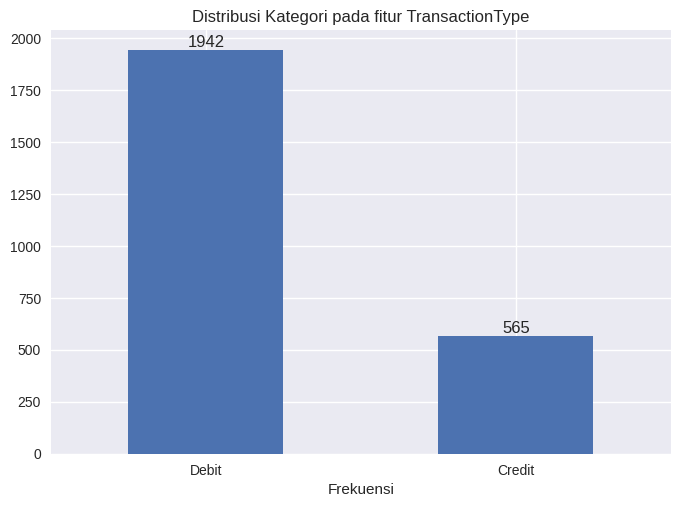

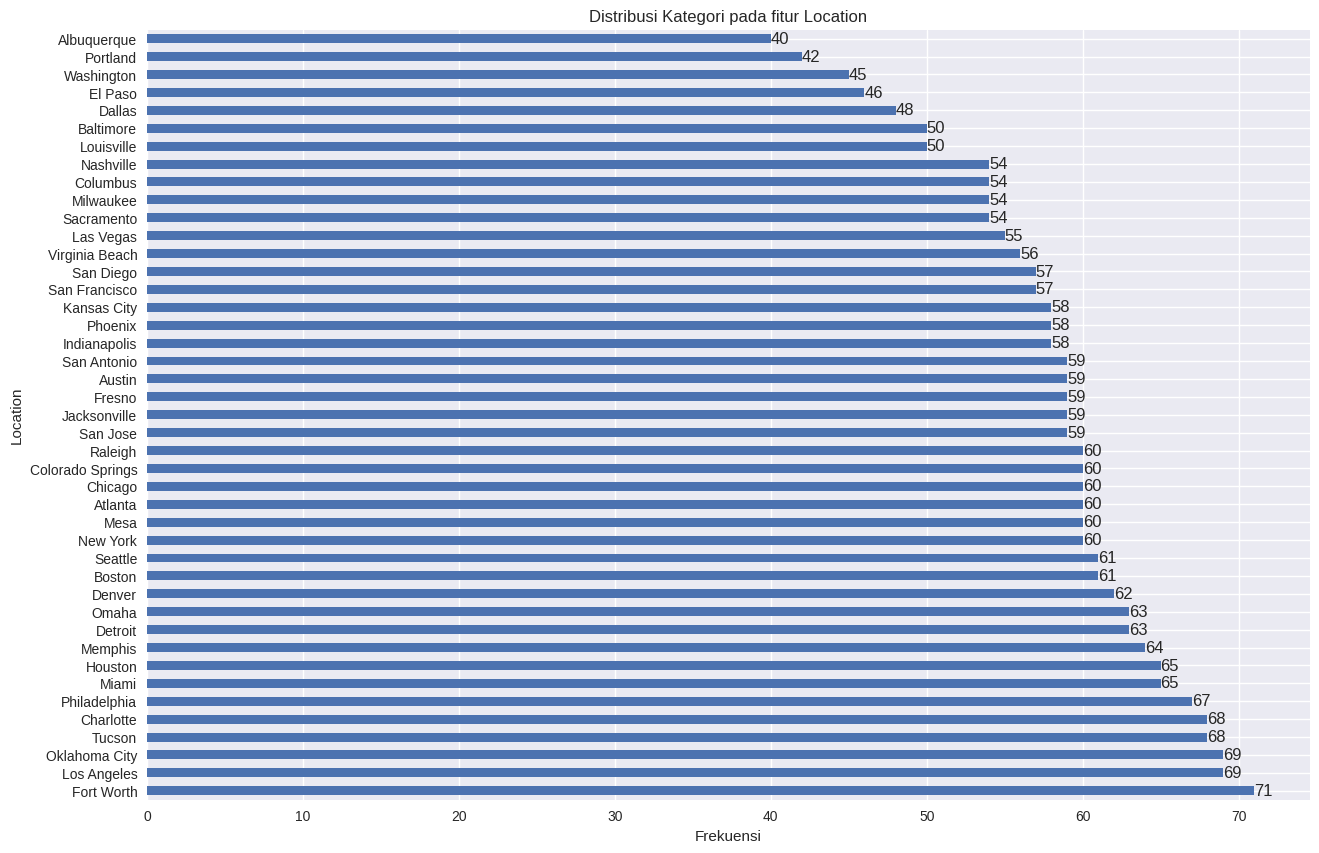

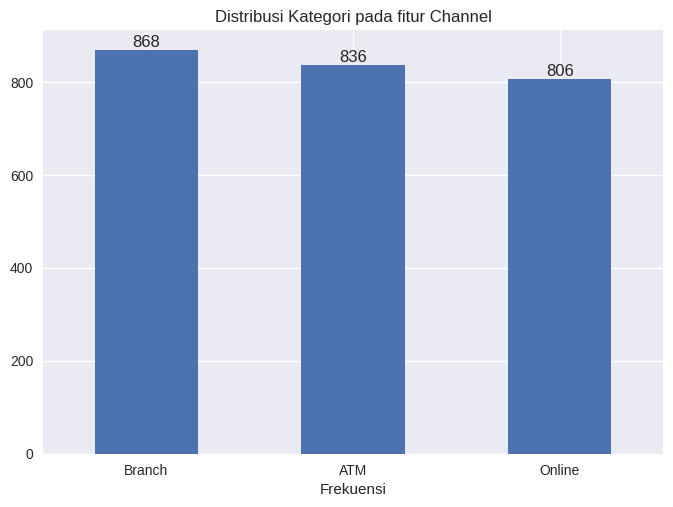

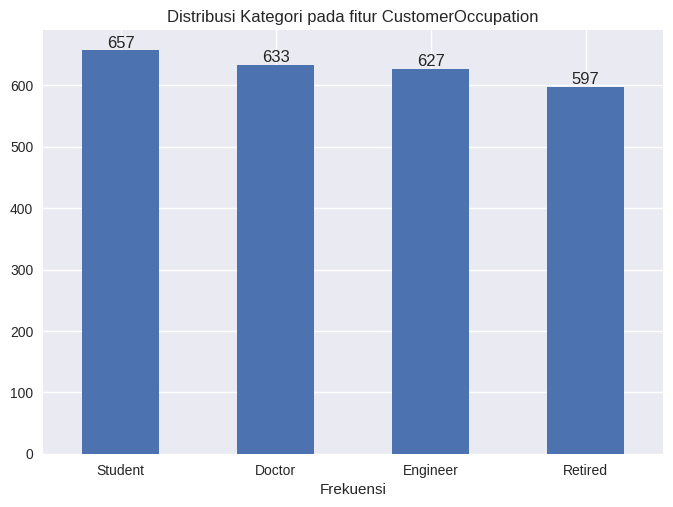

In [116]:
plt.style.use('seaborn-v0_8')

# menampilkan jumlah data pada dataset bertipe 'category'
for col in df.select_dtypes(include='category').columns:
  value = df[col].value_counts()

  fig,ax = plt.subplots()
  if col == 'Location':
    value.plot(kind='barh',xlabel='Frekuensi',figsize=(15,10),ax=ax)
    ax.set_title(f'Distribusi Kategori pada fitur {col}')
  else:
    value.plot(kind='bar',xlabel='Frekuensi',rot=0,ax=ax)
    ax.set_title(f'Distribusi Kategori pada fitur {col}')

  ax.bar_label(ax.containers[0],label_type='edge')
  plt.show()

  print('\n')

Berikut sebaran kategori pada feature:
1. `TransactionType` dengan kategori 'Debit' paling banyak jumlahnya dengan 1942 transaksi. Artinya banyak tranksaksi yang menggunakan debit sebagai metode pembayaran.

2. `Channel` dengan kategori 'Branch' paling banyak jumlahnya dengan 868 transaksi. Artinya banyak transaksi dilakukan lewat via Branch

3. `CustomerOccupation` dengan kategori 'Student' paling banyak jumlahnya dengan 657 transaksi Artinya transaksi banyak dilakukan oleh mahasiswa.

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

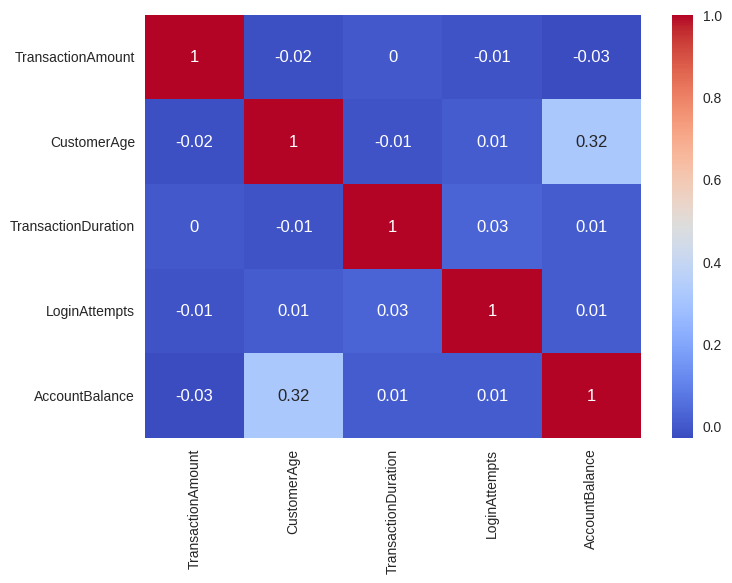

In [117]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
df_numeric = df.select_dtypes(include='number')
corr_matrix = df_numeric.corr()
sns.heatmap(corr_matrix.round(2), annot=True, cmap='coolwarm')
plt.show()

dilihat dari heatmap korelasi di atas, kelima feature tidak sama sekali berkorelasi atau korelasinya tidak kuat.

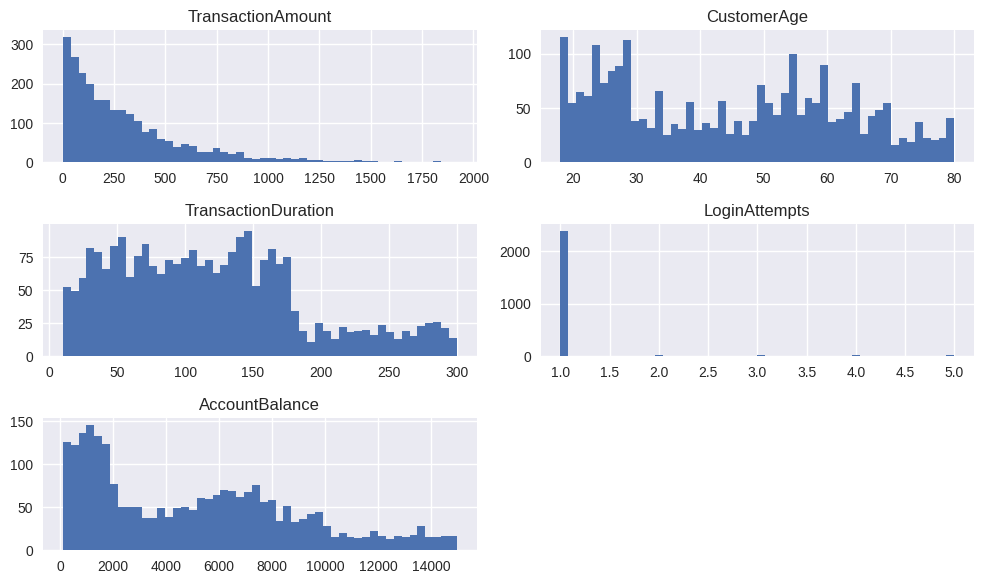

In [118]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
df_numeric.hist(figsize=(10, 6),bins=50)
plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

<ipython-input-119-af8abdea2cf7>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df,x='AccountBalance',y='TransactionAmount',palette='tab10',ax=ax)


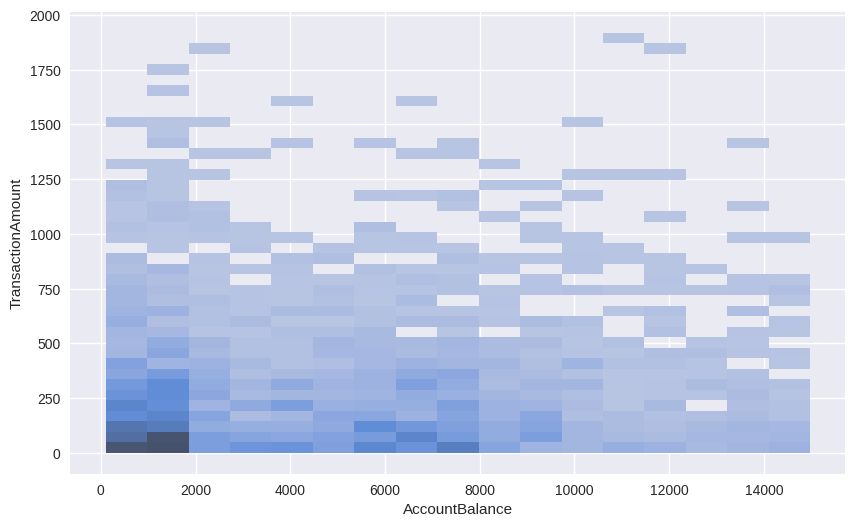

In [119]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)

# Histogram 2D
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(data=df,x='AccountBalance',y='TransactionAmount',palette='tab10',ax=ax)
plt.show()

berdasarkan plot histogram 2D menunjukan bahwa di seluruh rentang saldo rekening apapun, orang-orang akan bertransaksi dengan jumlah minimum atau sedikit. Ini disebabkan karena prinsip ekonomi dimana seseorang akan mengorbankan biaya sekecil-kecilnya untuk mendapatkan sesesatu yang diinginkan sebanyak banyak mungkin.

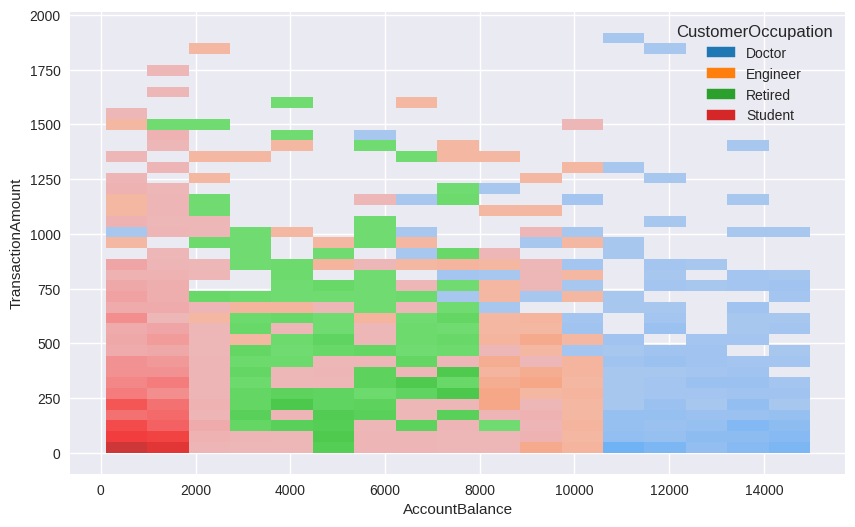

In [120]:
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(data=df,x='AccountBalance',y='TransactionAmount',hue='CustomerOccupation',palette='tab10',ax=ax)
plt.show()

Berdasarkan plot titik dan histogram 2D antara TransactionAmount dengan AccountBalance, kategori mahasiswa kebanyakan memiliki saldo rekening yang sedikit akan bertransaksi dengan jumlah uang yang sedikit juga, jarang ada yang bertransaksi dengan jumlah yang besar, dimana itu sudah masauk kategori boros. Untuk yang saldo rekening yang besar kebanyakan dipunyai orang dengan pekerjaan dokter karena pendapatan profesi ini termasuk tinggi

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `pd.get_dummies()` atau `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [121]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64

In [122]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

np.int64(21)

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [123]:
# Melakukan drop pada kolom yang memiliki keterangan id
df.drop(columns=['TransactionID','TransactionDate','AccountID','DeviceID','IP Address','MerchantID','PreviousTransactionDate'],axis=1,inplace=True)
df.head(10)

TransactionAmount TransactionType       Location Channel  CustomerAge  \
0              14.09           Debit      San Diego     ATM         70.0   
1             376.24           Debit        Houston     ATM         68.0   
2             126.29           Debit           Mesa  Online         19.0   
3             184.50           Debit        Raleigh  Online         26.0   
4              13.45          Credit        Atlanta  Online          NaN   
5              92.15           Debit  Oklahoma City     ATM         18.0   
6               7.08          Credit        Seattle     ATM         37.0   
7             171.42          Credit   Indianapolis  Branch         67.0   
8             106.23          Credit        Detroit  Branch         51.0   
9             815.96           Debit      Nashville     ATM         55.0   

  CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  
0             Doctor                 81.0            1.0         5112.21  
1             Doctor                141.0            1.0        13758.91  
2            Student                 56.0            1.0         1122.35  
3            Student                 25.0            1.0         8569.06  
4            Student                198.0            1.0         7429.40  
5            Student                172.0            1.0          781.68  
6             Doctor                139.0            1.0        13316.71  
7            Retired                291.0            1.0         2796.24  
8           Engineer                 86.0            1.0         9095.14  
9             Doctor                120.0            1.0         1021.88

In [124]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
df = df.dropna()
df = df.reset_index(drop=True)
display(df.info())
display(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2313 entries, 0 to 2312
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   TransactionAmount    2313 non-null   float64 
 1   TransactionType      2313 non-null   category
 2   Location             2313 non-null   category
 3   Channel              2313 non-null   category
 4   CustomerAge          2313 non-null   float64 
 5   CustomerOccupation   2313 non-null   category
 6   TransactionDuration  2313 non-null   float64 
 7   LoginAttempts        2313 non-null   float64 
 8   AccountBalance       2313 non-null   float64 
dtypes: category(4), float64(5)
memory usage: 101.3 KB


None

TransactionAmount TransactionType       Location Channel  CustomerAge  \
0              14.09           Debit      San Diego     ATM         70.0   
1             376.24           Debit        Houston     ATM         68.0   
2             126.29           Debit           Mesa  Online         19.0   
3             184.50           Debit        Raleigh  Online         26.0   
4              92.15           Debit  Oklahoma City     ATM         18.0   
5               7.08          Credit        Seattle     ATM         37.0   
6             171.42          Credit   Indianapolis  Branch         67.0   
7             106.23          Credit        Detroit  Branch         51.0   
8             815.96           Debit      Nashville     ATM         55.0   
9              17.78          Credit    Albuquerque  Online         52.0   

  CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  
0             Doctor                 81.0            1.0         5112.21  
1             Doctor                141.0            1.0        13758.91  
2            Student                 56.0            1.0         1122.35  
3            Student                 25.0            1.0         8569.06  
4            Student                172.0            1.0          781.68  
5             Doctor                139.0            1.0        13316.71  
6            Retired                291.0            1.0         2796.24  
7           Engineer                 86.0            1.0         9095.14  
8             Doctor                120.0            1.0         1021.88  
9           Engineer                 59.0            1.0         7599.52

In [125]:
# Menghapus data duplikat menggunakan drop_duplicates().
df = df.drop_duplicates()
df = df.reset_index(drop=True)
display(df.info())
display(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   TransactionAmount    2290 non-null   float64 
 1   TransactionType      2290 non-null   category
 2   Location             2290 non-null   category
 3   Channel              2290 non-null   category
 4   CustomerAge          2290 non-null   float64 
 5   CustomerOccupation   2290 non-null   category
 6   TransactionDuration  2290 non-null   float64 
 7   LoginAttempts        2290 non-null   float64 
 8   AccountBalance       2290 non-null   float64 
dtypes: category(4), float64(5)
memory usage: 100.4 KB


None

TransactionAmount TransactionType       Location Channel  CustomerAge  \
0              14.09           Debit      San Diego     ATM         70.0   
1             376.24           Debit        Houston     ATM         68.0   
2             126.29           Debit           Mesa  Online         19.0   
3             184.50           Debit        Raleigh  Online         26.0   
4              92.15           Debit  Oklahoma City     ATM         18.0   
5               7.08          Credit        Seattle     ATM         37.0   
6             171.42          Credit   Indianapolis  Branch         67.0   
7             106.23          Credit        Detroit  Branch         51.0   
8             815.96           Debit      Nashville     ATM         55.0   
9              17.78          Credit    Albuquerque  Online         52.0   

  CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  
0             Doctor                 81.0            1.0         5112.21  
1             Doctor                141.0            1.0        13758.91  
2            Student                 56.0            1.0         1122.35  
3            Student                 25.0            1.0         8569.06  
4            Student                172.0            1.0          781.68  
5             Doctor                139.0            1.0        13316.71  
6            Retired                291.0            1.0         2796.24  
7           Engineer                 86.0            1.0         9095.14  
8             Doctor                120.0            1.0         1021.88  
9           Engineer                 59.0            1.0         7599.52

In [126]:
# Melakukan feature encoding menggunakan pd.get_dummies() atau LabelEncoder() untuk fitur kategorikal.

# Inisialisasi LabelEncoder
le = LabelEncoder()

col_category = df.select_dtypes(include='category').columns.tolist()

# Melihat mapping antara nilai dari encode dan original labels
for col in col_category:
  df_encode = le.fit(df[col]).classes_
  for i, label in enumerate(df_encode):
    print(f"Encoded values for column '{i}': {label}")
  print('\n')

Encoded values for column '0': Credit
Encoded values for column '1': Debit


Encoded values for column '0': Albuquerque
Encoded values for column '1': Atlanta
Encoded values for column '2': Austin
Encoded values for column '3': Baltimore
Encoded values for column '4': Boston
Encoded values for column '5': Charlotte
Encoded values for column '6': Chicago
Encoded values for column '7': Colorado Springs
Encoded values for column '8': Columbus
Encoded values for column '9': Dallas
Encoded values for column '10': Denver
Encoded values for column '11': Detroit
Encoded values for column '12': El Paso
Encoded values for column '13': Fort Worth
Encoded values for column '14': Fresno
Encoded values for column '15': Houston
Encoded values for column '16': Indianapolis
Encoded values for column '17': Jacksonville
Encoded values for column '18': Kansas City
Encoded values for column '19': Las Vegas
Encoded values for column '20': Los Angeles
Encoded values for column '21': Louisville
Encoded values

In [127]:
# Lakukan label encoding untuk setiap kolom kategorikal
df_encode = df.copy()

# Dictionary untuk menyimpan list label kategorikal dalam bentuk string
label_encode_list = {}

for col in col_category:
  df_encode[col] = le.fit_transform(df_encode[col])
  label_encode_list[col] = le.inverse_transform(df_encode[col])

df_encode.head(10)

TransactionAmount  TransactionType  Location  Channel  CustomerAge  \
0              14.09                1        36        0         70.0   
1             376.24                1        15        0         68.0   
2             126.29                1        23        2         19.0   
3             184.50                1        33        2         26.0   
4              92.15                1        28        0         18.0   
5               7.08                0        39        0         37.0   
6             171.42                0        16        1         67.0   
7             106.23                0        11        1         51.0   
8             815.96                1        26        0         55.0   
9              17.78                0         0        2         52.0   

   CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  
0                   0                 81.0            1.0         5112.21  
1                   0                141.0            1.0        13758.91  
2                   3                 56.0            1.0         1122.35  
3                   3                 25.0            1.0         8569.06  
4                   3                172.0            1.0          781.68  
5                   0                139.0            1.0        13316.71  
6                   2                291.0            1.0         2796.24  
7                   1                 86.0            1.0         9095.14  
8                   0                120.0            1.0         1021.88  
9                   1                 59.0            1.0         7599.52

In [128]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.

# Buat objek StandardScaler
scaler = StandardScaler()

df_copy = df_encode.copy()

# Fit dan transform data numerik
df_copy = scaler.fit_transform(df_copy)
df_copy = pd.DataFrame(df_copy, columns=df.columns)

# Tampilkan data yang sudah distandarisasi
df_copy.head(10)

TransactionAmount  TransactionType  Location   Channel  CustomerAge  \
0          -0.973289         0.539322  1.211017 -1.221065     1.426568   
1           0.267271         0.539322 -0.501457 -1.221065     1.314511   
2          -0.588943         0.539322  0.150914  1.254578    -1.430874   
3          -0.389542         0.539322  0.966378  1.254578    -1.038676   
4          -0.705891         0.539322  0.558646 -1.221065    -1.486902   
5          -0.997302        -1.854180  1.455656 -1.221065    -0.422365   
6          -0.434348        -1.854180 -0.419910  0.016757     1.258483   
7          -0.657660        -1.854180 -0.827642  0.016757     0.362031   
8           1.773552         0.539322  0.395553 -1.221065     0.586144   
9          -0.960649        -1.854180 -1.724652  1.254578     0.418059   

   CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  
0           -1.334408            -0.548117      -0.204333        0.006355  
1           -1.334408             0.300327      -0.204333        2.220339  
2            1.310538            -0.901635      -0.204333       -1.015247  
3            1.310538            -1.339997      -0.204333        0.891480  
4            1.310538             0.738689      -0.204333       -1.102475  
5           -1.334408             0.272045      -0.204333        2.107114  
6            0.428889             2.421436      -0.204333       -0.586648  
7           -0.452759            -0.477413      -0.204333        1.026183  
8           -1.334408             0.003372      -0.204333       -1.040972  
9           -0.452759            -0.859213      -0.204333        0.643230

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [129]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.

In [130]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder atau get_dummies.

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
2. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
3. Jalankan cell code `joblib.dump(model_kmeans, "best_model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [131]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
df_copy.describe()

TransactionAmount  TransactionType      Location       Channel  \
count       2.290000e+03     2.290000e+03  2.290000e+03  2.290000e+03   
mean        6.205613e-18    -1.477712e-16  2.016824e-17 -8.222438e-17   
std         1.000218e+00     1.000218e+00  1.000218e+00  1.000218e+00   
min        -1.020664e+00    -1.854180e+00 -1.724652e+00 -1.221065e+00   
25%        -7.419108e-01     5.393219e-01 -8.276420e-01 -1.221065e+00   
50%        -2.910065e-01     5.393219e-01 -1.217854e-02  1.675654e-02   
75%         3.959263e-01     5.393219e-01  8.644447e-01  1.254578e+00   
max         5.552440e+00     5.393219e-01  1.700295e+00  1.254578e+00   

        CustomerAge  CustomerOccupation  TransactionDuration  LoginAttempts  \
count  2.290000e+03        2.290000e+03         2.290000e+03   2.290000e+03   
mean   1.303179e-16        4.460285e-17         2.482245e-17  -1.303179e-16   
std    1.000218e+00        1.000218e+00         1.000218e+00   1.000218e+00   
min   -1.486902e+00       -1.334408e+00        -1.552108e+00  -2.043329e-01   
25%   -9.826476e-01       -1.334408e+00        -8.026499e-01  -2.043329e-01   
50%    2.586108e-02        4.288892e-01        -1.097543e-01  -2.043329e-01   
75%    8.102567e-01        1.310538e+00         5.972821e-01  -2.043329e-01   
max    1.986850e+00        1.310538e+00         2.548702e+00   6.626651e+00   

       AccountBalance  
count    2.290000e+03  
mean    -8.765429e-17  
std      1.000218e+00  
min     -1.276456e+00  
25%     -9.225385e-01  
50%     -1.098697e-01  
75%      6.586818e-01  
max      2.532484e+00

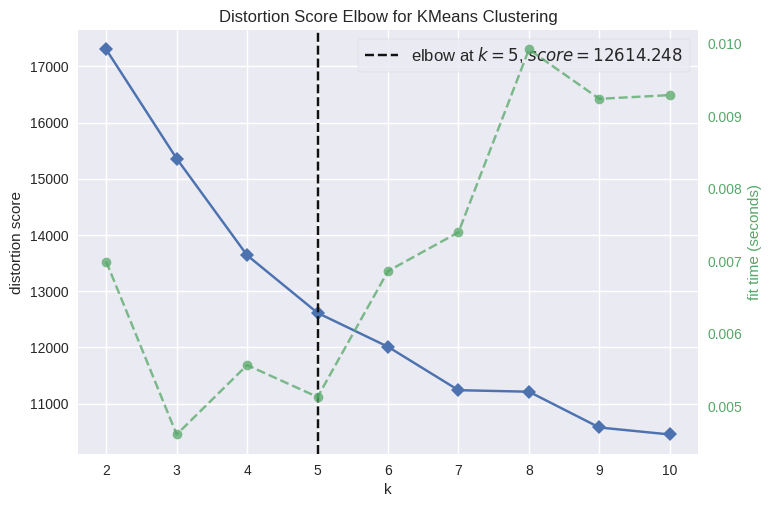

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [132]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()

# Inisialisasi model KMeans
model_kmeans = KMeans(random_state=300)

# Menentukan rentang nilai k
visualizer = KElbowVisualizer(model_kmeans, k=(2, 11))

# Melakukan fitting model ke data
visualizer.fit(df_copy)

# Menampilkan visualisasi Elbow Method
visualizer.show()


berdasarkan line graph metode elbow, nilai k=5 merupakan jumlah cluster yang paling bagus

In [133]:
# Menggunakan algoritma K-Means Clustering

# Inisialisasi model KMeans dengan k=6 dan metrik Euclidean
model_kmeans = KMeans(n_clusters=5, random_state=300)

# Melakukan fitting model ke data
labels = model_kmeans.fit_predict(df_copy)

# satukan label dalam df
df_copy['Cluster'] = labels

df_copy.head(10)

TransactionAmount  TransactionType  Location   Channel  CustomerAge  \
0          -0.973289         0.539322  1.211017 -1.221065     1.426568   
1           0.267271         0.539322 -0.501457 -1.221065     1.314511   
2          -0.588943         0.539322  0.150914  1.254578    -1.430874   
3          -0.389542         0.539322  0.966378  1.254578    -1.038676   
4          -0.705891         0.539322  0.558646 -1.221065    -1.486902   
5          -0.997302        -1.854180  1.455656 -1.221065    -0.422365   
6          -0.434348        -1.854180 -0.419910  0.016757     1.258483   
7          -0.657660        -1.854180 -0.827642  0.016757     0.362031   
8           1.773552         0.539322  0.395553 -1.221065     0.586144   
9          -0.960649        -1.854180 -1.724652  1.254578     0.418059   

   CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  \
0           -1.334408            -0.548117      -0.204333        0.006355   
1           -1.334408             0.300327      -0.204333        2.220339   
2            1.310538            -0.901635      -0.204333       -1.015247   
3            1.310538            -1.339997      -0.204333        0.891480   
4            1.310538             0.738689      -0.204333       -1.102475   
5           -1.334408             0.272045      -0.204333        2.107114   
6            0.428889             2.421436      -0.204333       -0.586648   
7           -0.452759            -0.477413      -0.204333        1.026183   
8           -1.334408             0.003372      -0.204333       -1.040972   
9           -0.452759            -0.859213      -0.204333        0.643230   

   Cluster  
0        0  
1        3  
2        4  
3        4  
4        4  
5        1  
6        1  
7        1  
8        0  
9        1

Jalankan cell code ini untuk menyimpan model kamu.

In [134]:
# Menyimpan model menggunakan joblib
joblib.dump(model_kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [135]:
# Menghitung dan menampilkan nilai Silhouette Score.
silhouette_avg = silhouette_score(df_copy.drop('Cluster', axis=1), df_copy['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.16201043529659545


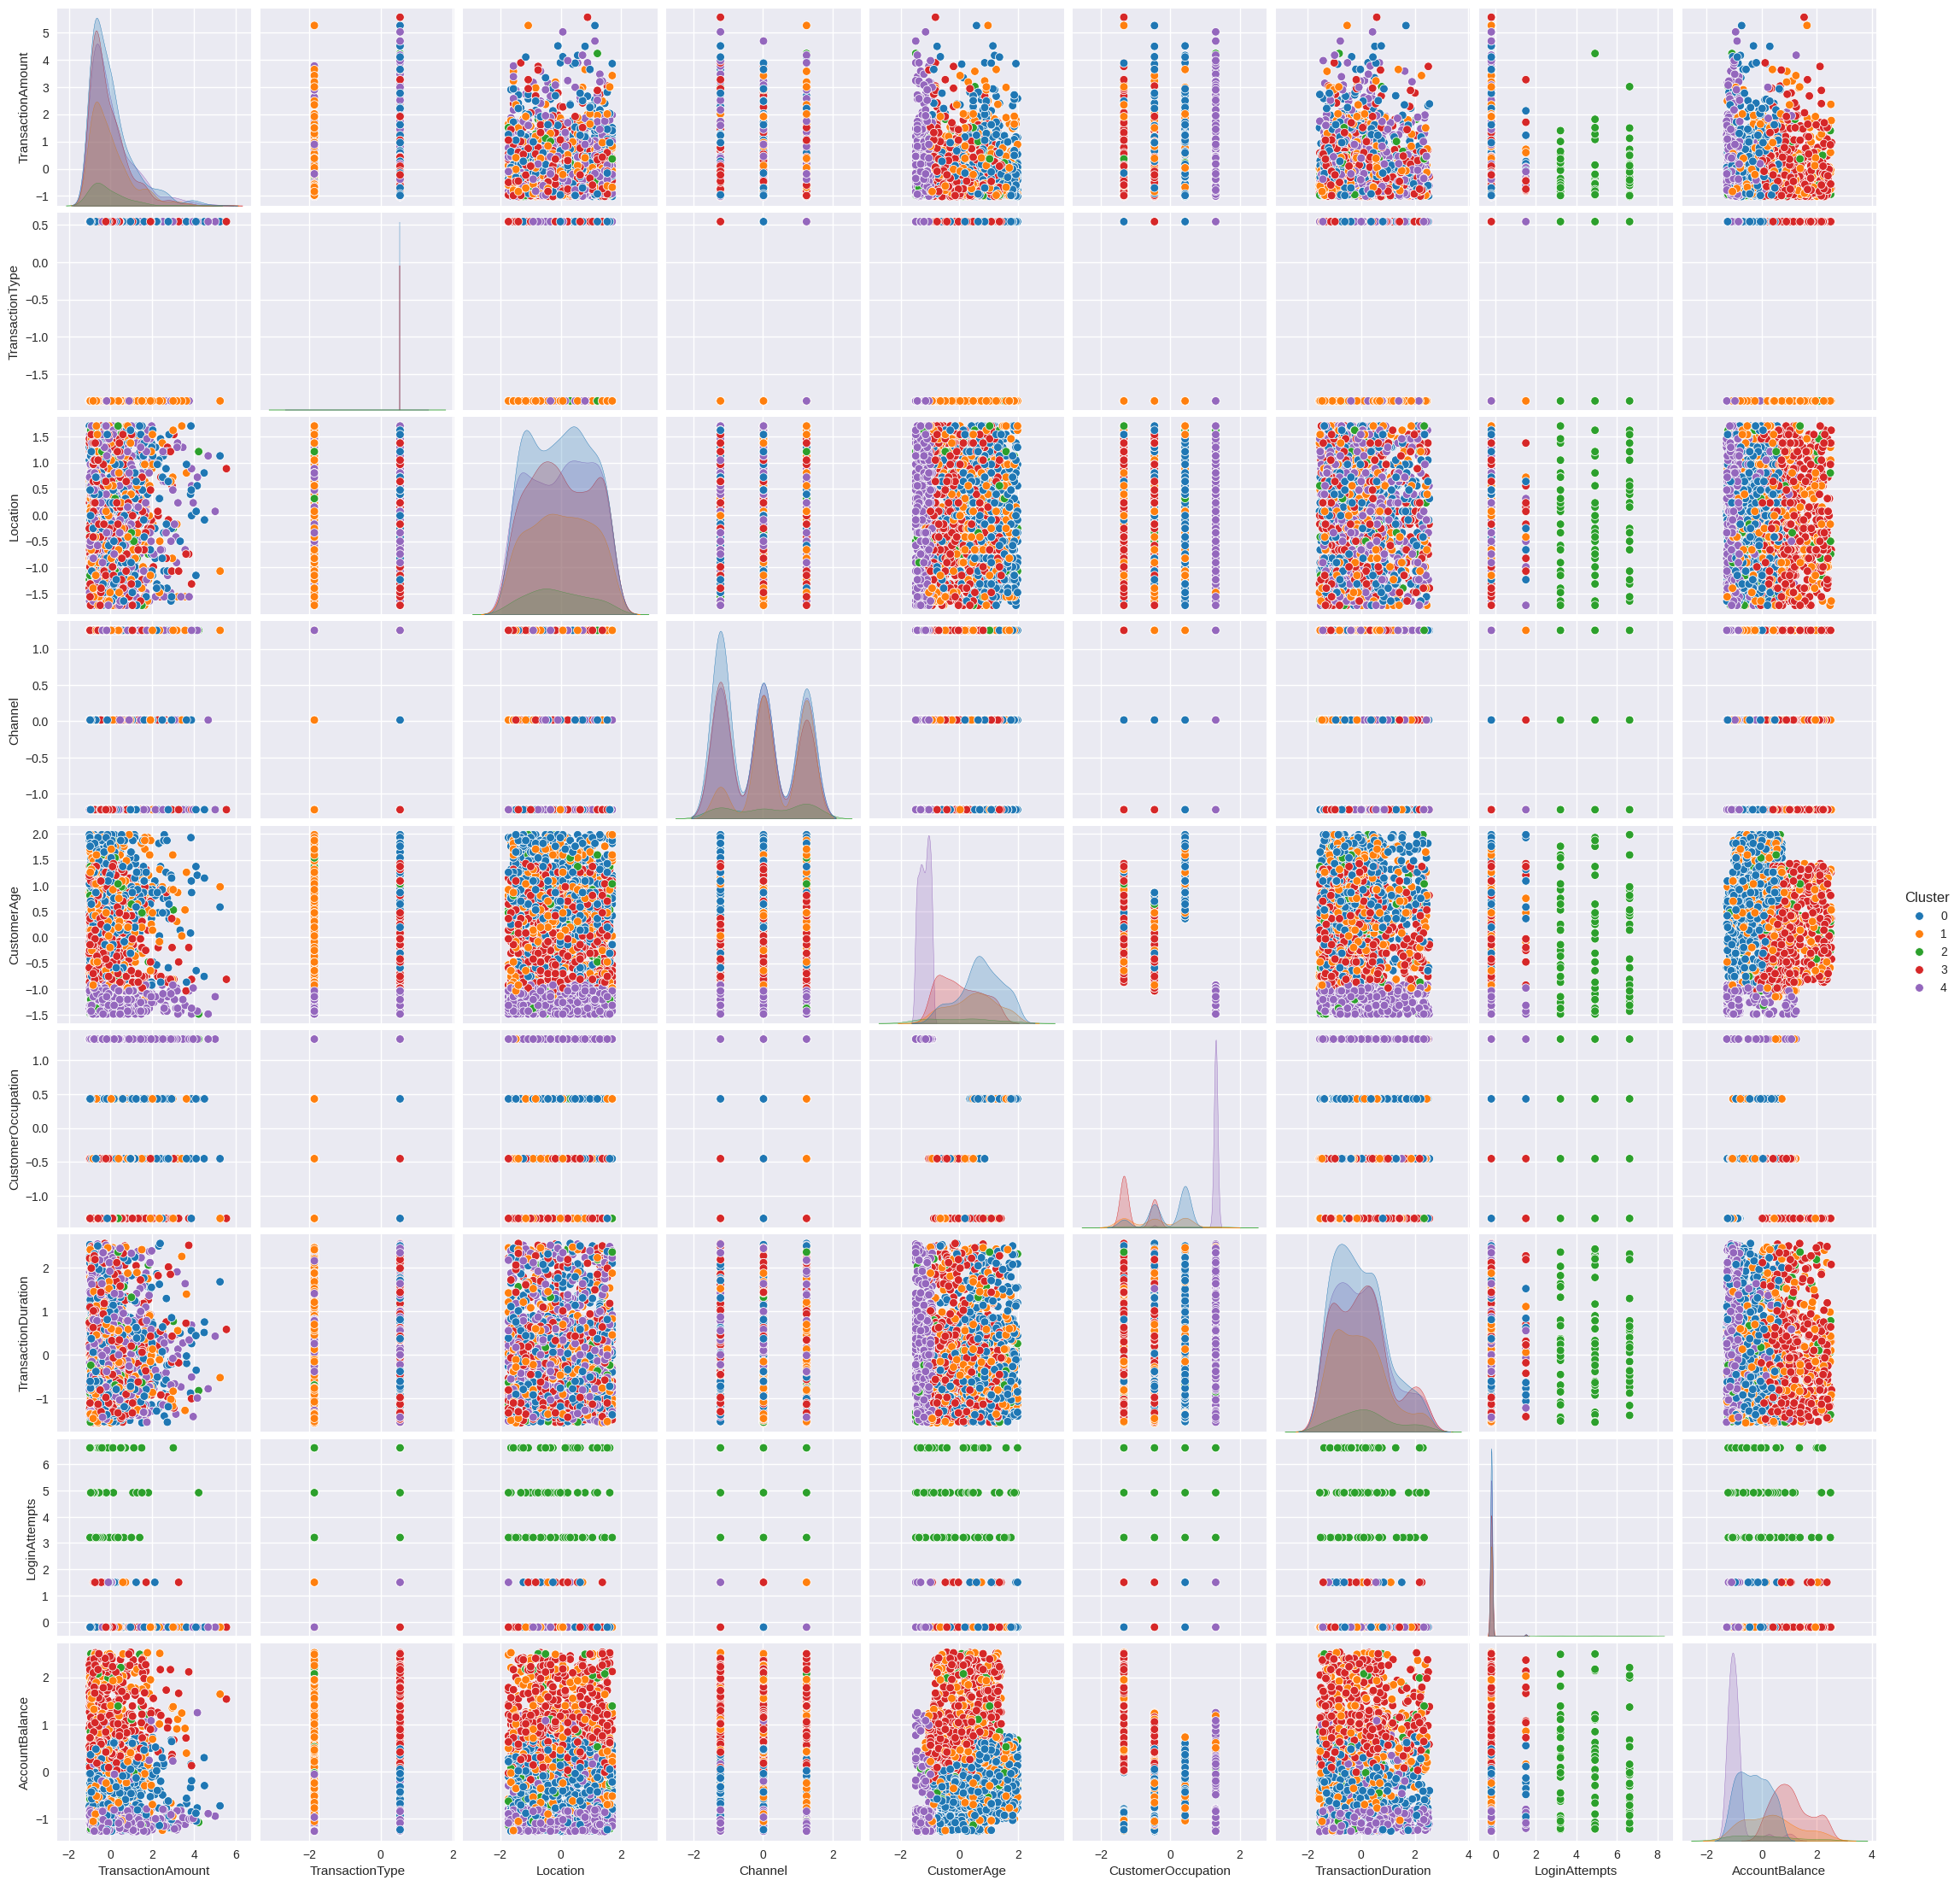

In [136]:
# Membuat visualisasi hasil clustering
sns.pairplot(df_copy,hue='Cluster',diag_kind='kde',palette='tab10',dropna=True)

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [137]:
# Membuat feature yang di PCA

# Drop the 'Cluster' column if it exists
if 'Cluster' in df.columns:
    df_copy = df_copy.drop('Cluster', axis=1)

# Initialize PCA with 2 components
pca = PCA(n_components=2)

# Fit and transform the data
principal_components = pca.fit_transform(df_copy)

# Create a new DataFrame with the principal components
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

df_pca.head(10)

PC1       PC2
0 -2.630590  0.265325
1 -0.474355  2.856959
2  2.859434 -0.808956
3  2.356856  0.530164
4  2.949892 -0.693424
5 -1.469308  1.883567
6 -1.238894 -0.977525
7 -1.416400  0.521041
8 -2.053945 -0.750862
9 -1.401633  0.208176

In [138]:
pca = PCA(n_components=2)
pca.fit(df_copy)
pca.explained_variance_ratio_

array([0.29700117, 0.13189916])

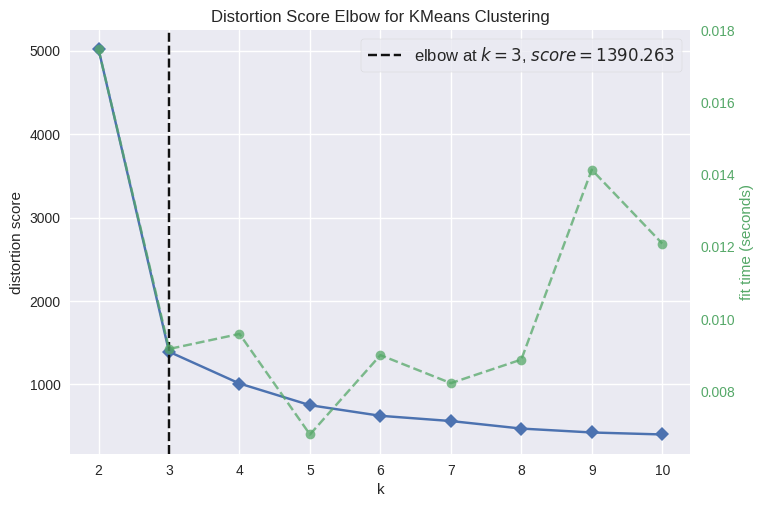

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [139]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()

# Inisialisasi model KMeans
model_kmeans = KMeans(random_state=300)

# Menentukan rentang nilai k
visualizer = KElbowVisualizer(model_kmeans, k=(2, 11))

# Melakukan fitting model ke data
visualizer.fit(df_pca)

# Menampilkan visualisasi Elbow Method
visualizer.show()

In [140]:
# Membangun model menggunakan PCA

# Inisialisasi model KMeans dengan k=6 dan metrik Euclidean
model_kmeans = KMeans(n_clusters=3, random_state=300)

# Melakukan fitting model ke data
labels = model_kmeans.fit_predict(df_pca)

# Menambahkan feature labels ke df_pca
df_pca['Cluster'] = labels

df_pca.head(10)

PC1       PC2  Cluster
0 -2.630590  0.265325        0
1 -0.474355  2.856959        2
2  2.859434 -0.808956        1
3  2.356856  0.530164        1
4  2.949892 -0.693424        1
5 -1.469308  1.883567        2
6 -1.238894 -0.977525        0
7 -1.416400  0.521041        0
8 -2.053945 -0.750862        0
9 -1.401633  0.208176        0

In [141]:
# Menghitung dan menampilkan nilai Silhouette Score.
silhouette_avg = silhouette_score(df_pca.drop('Cluster', axis=1), df_pca['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.7017098907977415


In [142]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
joblib.dump(model_kmeans, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

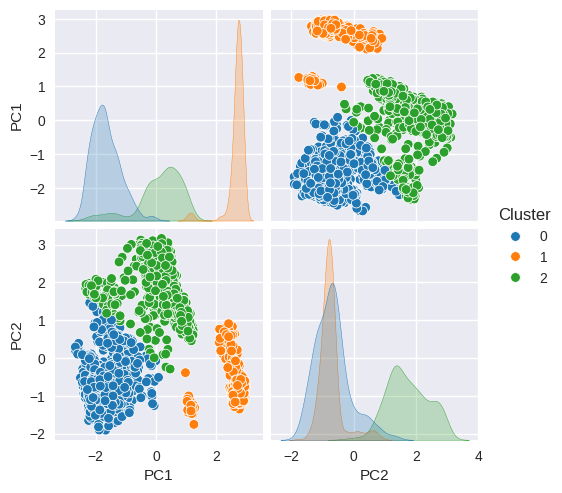

In [143]:
sns.pairplot(df_pca,hue='Cluster',diag_kind='kde',palette='tab10',dropna=True)

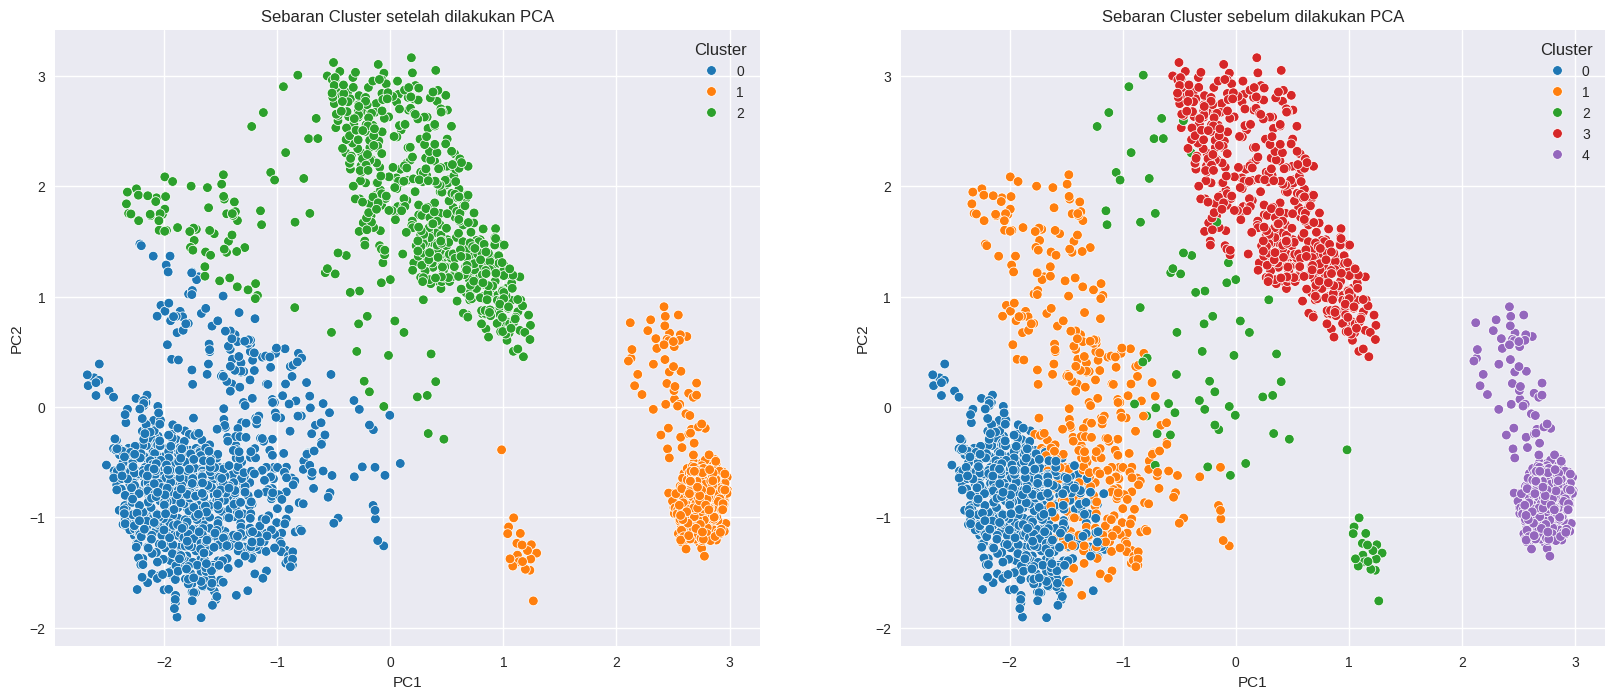

In [144]:
# Komparasi area clustering sebelum PCA dan sesudah PCA
fig, ax = plt.subplots(1,2,figsize=(20, 8))

sns.scatterplot(data=df_pca,x='PC1',y='PC2',hue='Cluster',palette='tab10',ax=ax[0])
ax[0].set_title('Sebaran Cluster setelah dilakukan PCA')
sns.scatterplot(data=df_pca,x='PC1',y='PC2',hue=df_copy['Cluster'],palette='tab10',ax=ax[1])
ax[1].set_title('Sebaran Cluster sebelum dilakukan PCA')
plt.show()

In [145]:
# Menggabungkan hasil cluster sebelum PCA ('Cluster_nonpca') ke dataframe PCA
df_pca['Cluster_nonpca'] = df_copy['Cluster']
df_pca.head(10)

PC1       PC2  Cluster  Cluster_nonpca
0 -2.630590  0.265325        0               0
1 -0.474355  2.856959        2               3
2  2.859434 -0.808956        1               4
3  2.356856  0.530164        1               4
4  2.949892 -0.693424        1               4
5 -1.469308  1.883567        2               1
6 -1.238894 -0.977525        0               1
7 -1.416400  0.521041        0               1
8 -2.053945 -0.750862        0               0
9 -1.401633  0.208176        0               1

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [146]:
df_copy['Cluster'] = df_pca['Cluster_nonpca']
df_copy['Cluster_pca'] = df_pca['Cluster']
df_copy.head(10)

TransactionAmount  TransactionType  Location   Channel  CustomerAge  \
0          -0.973289         0.539322  1.211017 -1.221065     1.426568   
1           0.267271         0.539322 -0.501457 -1.221065     1.314511   
2          -0.588943         0.539322  0.150914  1.254578    -1.430874   
3          -0.389542         0.539322  0.966378  1.254578    -1.038676   
4          -0.705891         0.539322  0.558646 -1.221065    -1.486902   
5          -0.997302        -1.854180  1.455656 -1.221065    -0.422365   
6          -0.434348        -1.854180 -0.419910  0.016757     1.258483   
7          -0.657660        -1.854180 -0.827642  0.016757     0.362031   
8           1.773552         0.539322  0.395553 -1.221065     0.586144   
9          -0.960649        -1.854180 -1.724652  1.254578     0.418059   

   CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  \
0           -1.334408            -0.548117      -0.204333        0.006355   
1           -1.334408             0.300327      -0.204333        2.220339   
2            1.310538            -0.901635      -0.204333       -1.015247   
3            1.310538            -1.339997      -0.204333        0.891480   
4            1.310538             0.738689      -0.204333       -1.102475   
5           -1.334408             0.272045      -0.204333        2.107114   
6            0.428889             2.421436      -0.204333       -0.586648   
7           -0.452759            -0.477413      -0.204333        1.026183   
8           -1.334408             0.003372      -0.204333       -1.040972   
9           -0.452759            -0.859213      -0.204333        0.643230   

   Cluster  Cluster_pca  
0        0            0  
1        3            2  
2        4            1  
3        4            1  
4        4            1  
5        1            2  
6        1            0  
7        1            0  
8        0            0  
9        1            0

In [147]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan modus untuk fitur kategorikal.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
col_numeric = df.select_dtypes(include='number').columns.tolist()
col_category = df.select_dtypes(include='category').columns.tolist()

# analisis deskriptif fitur numerik
display(df_copy.groupby('Cluster_pca')[col_numeric].agg(['mean','median','std','min','max']).round(3).T)

Cluster_pca                     0      1      2
TransactionAmount   mean    0.038  0.058 -0.112
                    median -0.242 -0.274 -0.418
                    std     1.028  1.058  0.889
                    min    -1.019 -1.021 -1.020
                    max     5.251  5.015  5.552
CustomerAge         mean    0.680 -1.200  0.052
                    median  0.698 -1.207 -0.030
                    std     0.757  0.176  0.715
                    min    -1.375 -1.487 -1.039
                    max     1.987 -0.927  1.987
TransactionDuration mean   -0.036  0.007  0.050
                    median -0.152 -0.103 -0.025
                    std     0.972  1.014  1.028
                    min    -1.552 -1.538 -1.552
                    max     2.549  2.535  2.549
LoginAttempts       mean   -0.087 -0.030  0.164
                    median -0.204 -0.204 -0.204
                    std     0.769  0.919  1.320
                    min    -0.204 -0.204 -0.204
                    max     6.627  6.627  6.627
AccountBalance      mean   -0.185 -0.921  1.138
                    median -0.219 -1.028  1.063
                    std     0.631  0.451  0.735
                    min    -1.274 -1.276 -1.221
                    max     1.813  1.248  2.532

In [148]:
def func_mode(x):
  mode = stats.mode(x)
  value = round(mode[0],3)
  count = round(mode[1],3)
  return value, count

# analisis deskriptif fitur kategorikal
display(df_copy.groupby('Cluster_pca')[col_category].agg(lambda x : ({'mode':func_mode(x)[0],'count':func_mode(x)[1]})))

TransactionType                       Location  \
Cluster_pca                                                                 
0            {'mode': 0.539, 'count': 694}  {'mode': -0.501, 'count': 33}   
1            {'mode': 0.539, 'count': 489}  {'mode': -0.094, 'count': 20}   
2            {'mode': 0.539, 'count': 591}  {'mode': -0.665, 'count': 24}   

                                    Channel              CustomerOccupation  
Cluster_pca                                                                  
0             {'mode': 0.017, 'count': 359}   {'mode': 0.429, 'count': 536}  
1             {'mode': 0.017, 'count': 210}   {'mode': 1.311, 'count': 601}  
2            {'mode': -1.221, 'count': 234}  {'mode': -1.334, 'count': 440}

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

2. **Cluster 2: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

3. **Cluster 3: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [150]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df_copy.rename(columns={'Cluster':'Target','Cluster_pca':'Target_pca'},inplace=True)
df_copy.head(10)

TransactionAmount  TransactionType  Location   Channel  CustomerAge  \
0          -0.973289         0.539322  1.211017 -1.221065     1.426568   
1           0.267271         0.539322 -0.501457 -1.221065     1.314511   
2          -0.588943         0.539322  0.150914  1.254578    -1.430874   
3          -0.389542         0.539322  0.966378  1.254578    -1.038676   
4          -0.705891         0.539322  0.558646 -1.221065    -1.486902   
5          -0.997302        -1.854180  1.455656 -1.221065    -0.422365   
6          -0.434348        -1.854180 -0.419910  0.016757     1.258483   
7          -0.657660        -1.854180 -0.827642  0.016757     0.362031   
8           1.773552         0.539322  0.395553 -1.221065     0.586144   
9          -0.960649        -1.854180 -1.724652  1.254578     0.418059   

   CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  \
0           -1.334408            -0.548117      -0.204333        0.006355   
1           -1.334408             0.300327      -0.204333        2.220339   
2            1.310538            -0.901635      -0.204333       -1.015247   
3            1.310538            -1.339997      -0.204333        0.891480   
4            1.310538             0.738689      -0.204333       -1.102475   
5           -1.334408             0.272045      -0.204333        2.107114   
6            0.428889             2.421436      -0.204333       -0.586648   
7           -0.452759            -0.477413      -0.204333        1.026183   
8           -1.334408             0.003372      -0.204333       -1.040972   
9           -0.452759            -0.859213      -0.204333        0.643230   

   Target  Target_pca  
0       0           0  
1       3           2  
2       4           1  
3       4           1  
4       4           1  
5       1           2  
6       1           0  
7       1           0  
8       0           0  
9       1           0

In [151]:
# Simpan Data
df_copy.to_csv('data_clustering_scaler.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [152]:
# inverse dataset ke rentang normal
target = df_copy[['Target','Target_pca']]
scaler_df = df_copy.copy()
scaler_df = scaler_df.drop(['Target','Target_pca'],axis=1)
df_inverse = scaler.inverse_transform(scaler_df)
df_inverse = pd.DataFrame(df_inverse, columns=df.columns)
df_inverse[['Target','Target_pca']] = target
df_inverse.head(10)

TransactionAmount  TransactionType  Location  Channel  CustomerAge  \
0              14.09              1.0      36.0      0.0         70.0   
1             376.24              1.0      15.0      0.0         68.0   
2             126.29              1.0      23.0      2.0         19.0   
3             184.50              1.0      33.0      2.0         26.0   
4              92.15              1.0      28.0      0.0         18.0   
5               7.08              0.0      39.0      0.0         37.0   
6             171.42              0.0      16.0      1.0         67.0   
7             106.23              0.0      11.0      1.0         51.0   
8             815.96              1.0      26.0      0.0         55.0   
9              17.78              0.0       0.0      2.0         52.0   

   CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  \
0                 0.0                 81.0            1.0         5112.21   
1                 0.0                141.0            1.0        13758.91   
2                 3.0                 56.0            1.0         1122.35   
3                 3.0                 25.0            1.0         8569.06   
4                 3.0                172.0            1.0          781.68   
5                 0.0                139.0            1.0        13316.71   
6                 2.0                291.0            1.0         2796.24   
7                 1.0                 86.0            1.0         9095.14   
8                 0.0                120.0            1.0         1021.88   
9                 1.0                 59.0            1.0         7599.52   

   Target  Target_pca  
0       0           0  
1       3           2  
2       4           1  
3       4           1  
4       4           1  
5       1           2  
6       1           0  
7       1           0  
8       0           0  
9       1           0

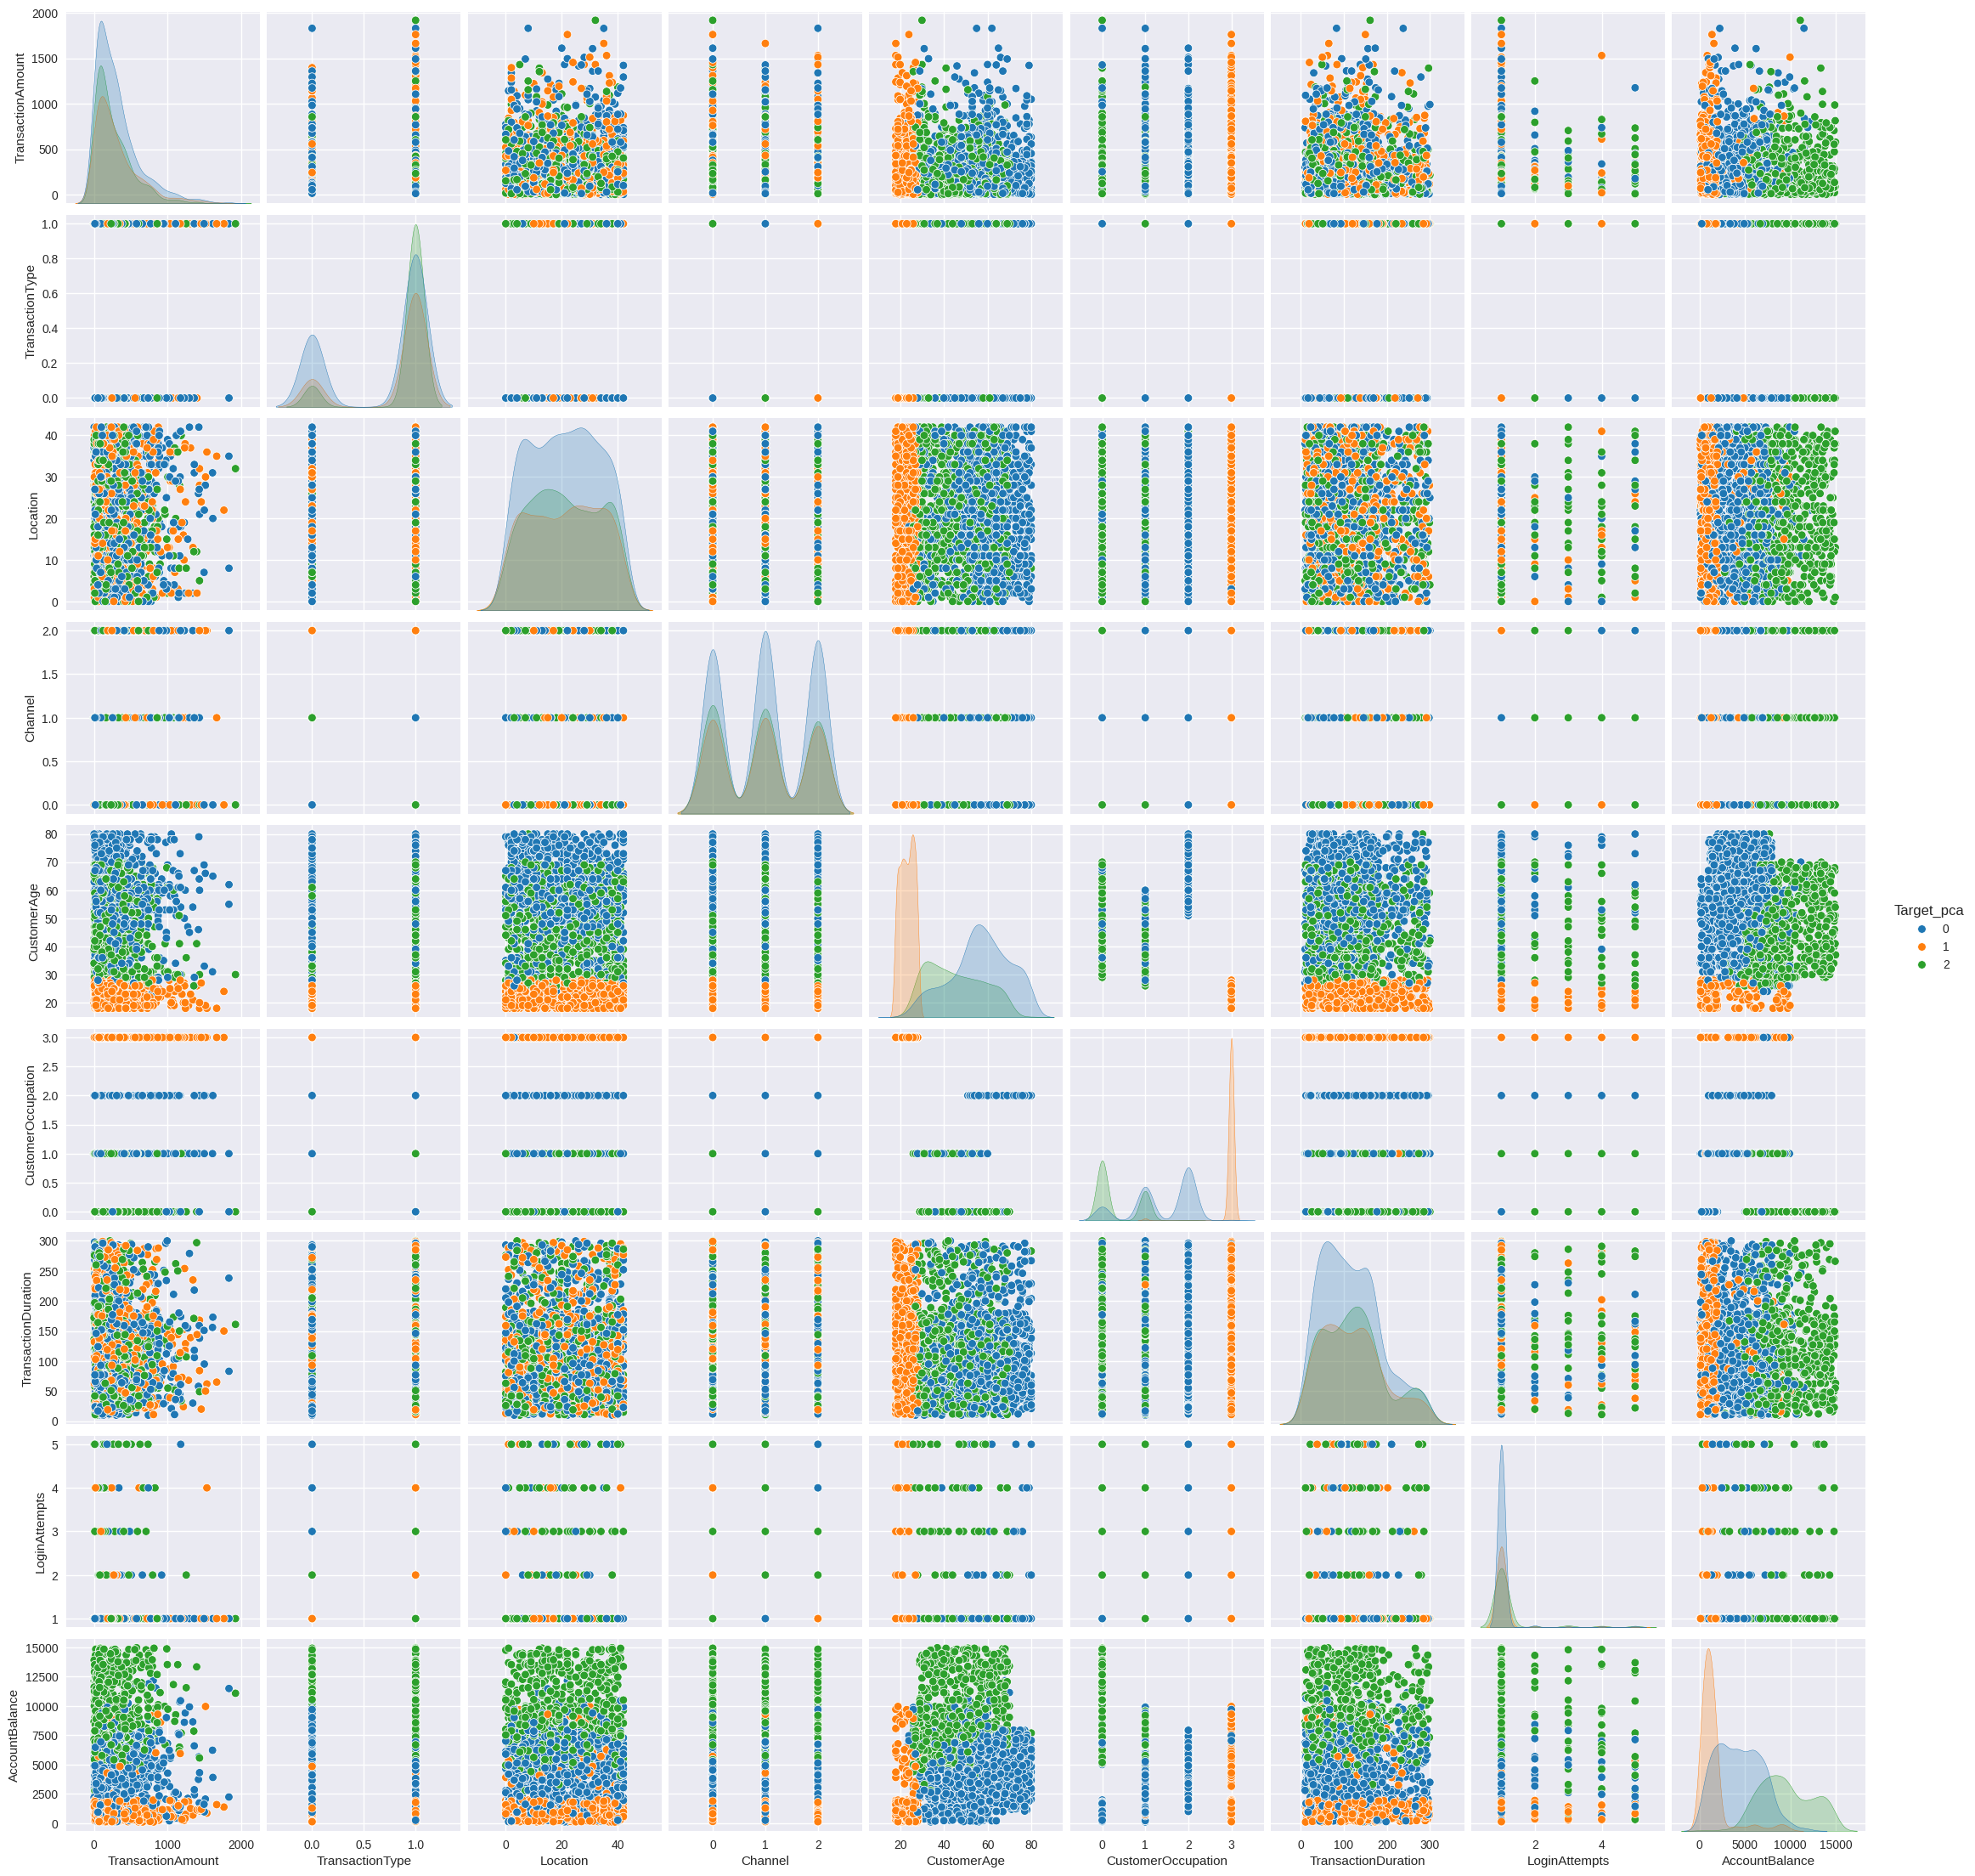

In [153]:
df_inverse_copy = df_inverse.copy()
df_inverse_copy.drop(columns=['Target'],inplace=True)
sns.pairplot(df_inverse_copy,hue='Target_pca',diag_kind='kde',palette='tab10',dropna=True)

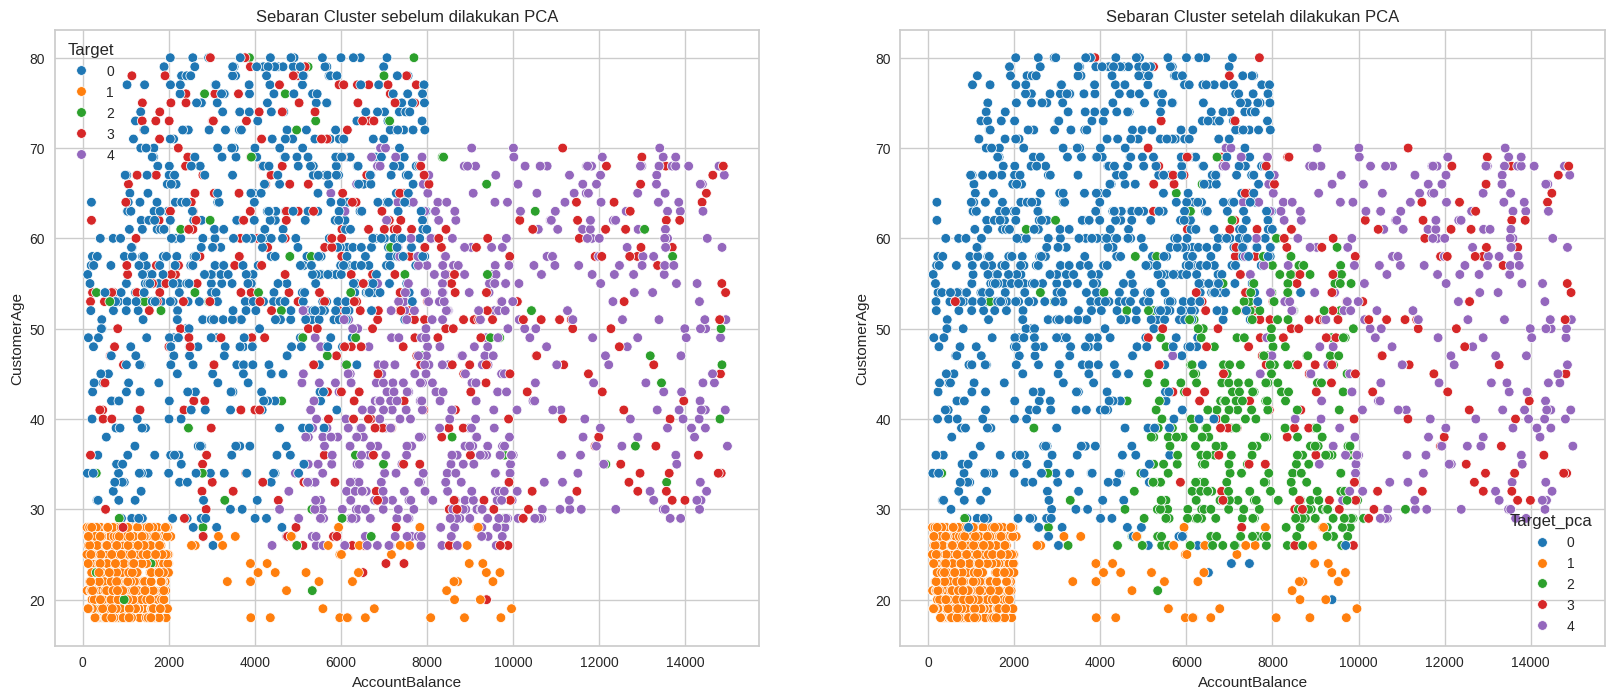

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20, 8))
sns.scatterplot(data=df_inverse,x='AccountBalance',y='CustomerAge',hue='Target',palette='tab10',ax=ax[0])
ax[0].set_title('Sebaran Cluster sebelum dilakukan PCA')
sns.scatterplot(data=df_inverse_copy,x='AccountBalance',y='CustomerAge',hue='Target_pca',palette='tab10',ax=ax[1])
ax[1].set_title('Sebaran Cluster setelah dilakukan PCA')
plt.show()

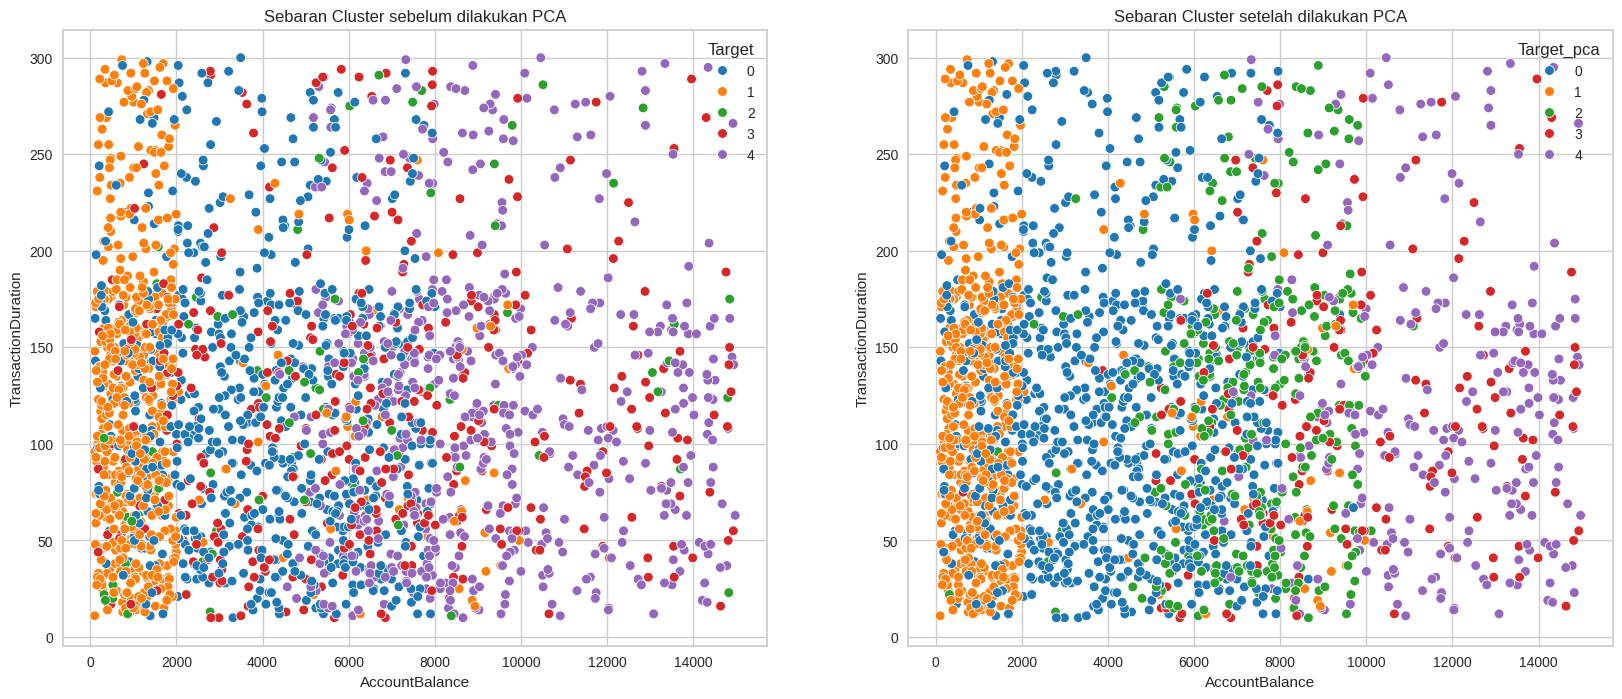

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20, 8))
sns.scatterplot(data=df_inverse,x='AccountBalance',y='TransactionDuration',hue='Target',palette='tab10',ax=ax[0])
ax[0].set_title('Sebaran Cluster sebelum dilakukan PCA')
sns.scatterplot(data=df_inverse_copy,x='AccountBalance',y='TransactionDuration',hue='Target_pca',palette='tab10',ax=ax[1])
ax[1].set_title('Sebaran Cluster setelah dilakukan PCA')
plt.show()

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
col_category

['TransactionType', 'Location', 'Channel', 'CustomerOccupation']

In [ ]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
for col in col_category:
  df_inverse[col] = df_inverse[col].astype('int64')
  df_inverse[col] = label_encode_list[col]
df_inverse.head(10)

TransactionAmount TransactionType       Location Channel  CustomerAge  \
0              14.09           Debit      San Diego     ATM         70.0   
1             376.24           Debit        Houston     ATM         68.0   
2             126.29           Debit           Mesa  Online         19.0   
3             184.50           Debit        Raleigh  Online         26.0   
4              92.15           Debit  Oklahoma City     ATM         18.0   
5               7.08          Credit        Seattle     ATM         37.0   
6             171.42          Credit   Indianapolis  Branch         67.0   
7             106.23          Credit        Detroit  Branch         51.0   
8             815.96           Debit      Nashville     ATM         55.0   
9              17.78          Credit    Albuquerque  Online         52.0   

  CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  \
0             Doctor                 81.0            1.0         5112.21   
1             Doctor                141.0            1.0        13758.91   
2            Student                 56.0            1.0         1122.35   
3            Student                 25.0            1.0         8569.06   
4            Student                172.0            1.0          781.68   
5             Doctor                139.0            1.0        13316.71   
6            Retired                291.0            1.0         2796.24   
7           Engineer                 86.0            1.0         9095.14   
8             Doctor                120.0            1.0         1021.88   
9           Engineer                 59.0            1.0         7599.52   

   Target  Target_pca  
0       0           3  
1       4           4  
2       1           1  
3       1           1  
4       1           1  
5       3           3  
6       3           0  
7       3           3  
8       0           0  
9       3           3

In [ ]:
df.head(10)

TransactionAmount TransactionType       Location Channel  CustomerAge  \
0              14.09           Debit      San Diego     ATM         70.0   
1             376.24           Debit        Houston     ATM         68.0   
2             126.29           Debit           Mesa  Online         19.0   
3             184.50           Debit        Raleigh  Online         26.0   
4              92.15           Debit  Oklahoma City     ATM         18.0   
5               7.08          Credit        Seattle     ATM         37.0   
6             171.42          Credit   Indianapolis  Branch         67.0   
7             106.23          Credit        Detroit  Branch         51.0   
8             815.96           Debit      Nashville     ATM         55.0   
9              17.78          Credit    Albuquerque  Online         52.0   

  CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  
0             Doctor                 81.0            1.0         5112.21  
1             Doctor                141.0            1.0        13758.91  
2            Student                 56.0            1.0         1122.35  
3            Student                 25.0            1.0         8569.06  
4            Student                172.0            1.0          781.68  
5             Doctor                139.0            1.0        13316.71  
6            Retired                291.0            1.0         2796.24  
7           Engineer                 86.0            1.0         9095.14  
8             Doctor                120.0            1.0         1021.88  
9           Engineer                 59.0            1.0         7599.52

In [ ]:
df_inverse.head(10)

TransactionAmount TransactionType       Location Channel  CustomerAge  \
0              14.09           Debit      San Diego     ATM         70.0   
1             376.24           Debit        Houston     ATM         68.0   
2             126.29           Debit           Mesa  Online         19.0   
3             184.50           Debit        Raleigh  Online         26.0   
4              92.15           Debit  Oklahoma City     ATM         18.0   
5               7.08          Credit        Seattle     ATM         37.0   
6             171.42          Credit   Indianapolis  Branch         67.0   
7             106.23          Credit        Detroit  Branch         51.0   
8             815.96           Debit      Nashville     ATM         55.0   
9              17.78          Credit    Albuquerque  Online         52.0   

  CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  \
0             Doctor                 81.0            1.0         5112.21   
1             Doctor                141.0            1.0        13758.91   
2            Student                 56.0            1.0         1122.35   
3            Student                 25.0            1.0         8569.06   
4            Student                172.0            1.0          781.68   
5             Doctor                139.0            1.0        13316.71   
6            Retired                291.0            1.0         2796.24   
7           Engineer                 86.0            1.0         9095.14   
8             Doctor                120.0            1.0         1021.88   
9           Engineer                 59.0            1.0         7599.52   

   Target  Target_pca  
0       0           3  
1       4           4  
2       1           1  
3       1           1  
4       1           1  
5       3           3  
6       3           0  
7       3           3  
8       0           0  
9       3           3

In [ ]:
# Simpan Data
df_inverse.to_csv('data_clustering_inverse.csv', index=False)